Loan Prediction 

Target value = Loan_Status

Importing the libraries

In [80]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


Importing the datasets

In [81]:
data_train = pd.read_csv(r'C:\Users\divya\OneDrive\Desktop\loan_prediction\train_u6lujuX_CVtuZ9i.csv')
data_test = pd.read_csv(r'C:\Users\divya\OneDrive\Desktop\loan_prediction\test_Y3wMUE5_7gLdaTN.csv')

In [82]:
#training set
data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [83]:
data_train.shape

(614, 13)

In [84]:
#test set
data_test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [85]:
data_test.shape

(367, 12)

Data preprocessing and analysis

In [86]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [87]:
# summary statistics
data_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [88]:
# As ID column is not needed so lets drop it for both the train and test set
data_train = data_train.drop('Loan_ID', axis =1)
data_test = data_test.drop('Loan_ID', axis = 1)

In [89]:
# lets check their shape
print(data_train.shape)
print(data_test.shape)

(614, 12)
(367, 11)


Missing values

In [90]:
# check for null values
data_train.isnull().sum().sort_values(ascending= False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [91]:
# total number of null values 
data_train.isnull().sum().sum()

149

In [92]:
#filling the missing data
print("Before filling missing values\n\n")
null_cols = ['Credit_History', 'Self_Employed', 'LoanAmount','Dependents', 'Loan_Amount_Term', 'Gender', 'Married']


for col in null_cols:
    print(f"{col}:\n{data_train[col].value_counts()}\n")
    data_train[col] = data_train[col].fillna(
    data_train[col].dropna().mode().values[0] )   

    


Before filling missing values


Credit_History:
1.0    475
0.0     89
Name: Credit_History, dtype: int64

Self_Employed:
No     500
Yes     82
Name: Self_Employed, dtype: int64

LoanAmount:
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
211.0     1
250.0     1
62.0      1
85.0      1
436.0     1
Name: LoanAmount, Length: 203, dtype: int64

Dependents:
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Loan_Amount_Term:
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Gender:
Male      489
Female    112
Name: Gender, dtype: int64

Married:
Yes    398
No     213
Name: Married, dtype: int64



In [93]:
data_train.isnull().sum().sort_values(ascending=False)
print("After filling missing values\n")
for col in null_cols:
    print(f"\n{col}:\n{data_train[col].value_counts()}\n")

After filling missing values


Credit_History:
1.0    525
0.0     89
Name: Credit_History, dtype: int64


Self_Employed:
No     532
Yes     82
Name: Self_Employed, dtype: int64


LoanAmount:
120.0    42
110.0    17
100.0    15
160.0    12
187.0    12
         ..
211.0     1
250.0     1
62.0      1
85.0      1
436.0     1
Name: LoanAmount, Length: 203, dtype: int64


Dependents:
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Loan_Amount_Term:
360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


Gender:
Male      502
Female    112
Name: Gender, dtype: int64


Married:
Yes    401
No     213
Name: Married, dtype: int64



DATA VISUALIZATION

In [94]:
# First we need to split our data into numerical and categorical data
# list to numeric data
num = data_train.select_dtypes('number').columns.to_list()

# list to categorical data
cat = data_train.select_dtypes('object').columns.to_list()

# numeric DataFrame
loan_num =  data_train[num]
#categoric df
loan_cat = data_train[cat]

Y    422
N    192
Name: Loan_Status, dtype: int64


C:\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


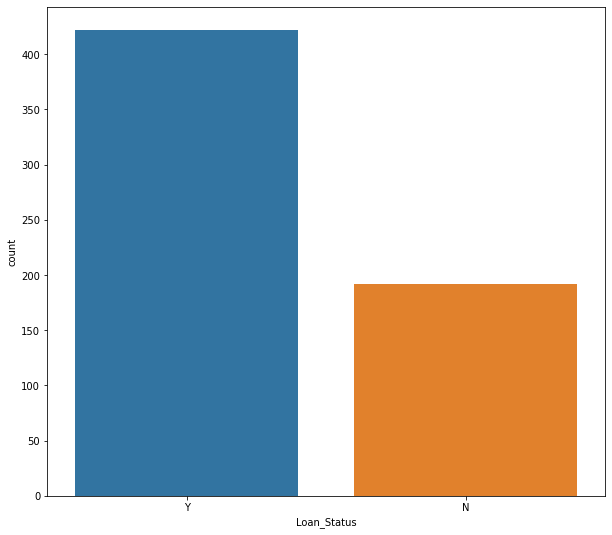

In [95]:
print(data_train[cat[-1]].value_counts())

total = float(len(data_train[cat[-1]]))
plt.figure(figsize=(10,9))

ax = sns.countplot(data_train[cat[-1]]) 
plt.show()

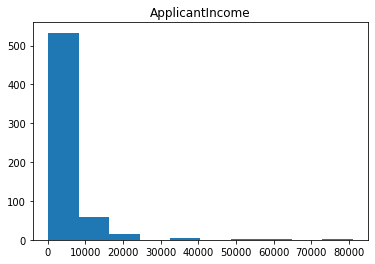

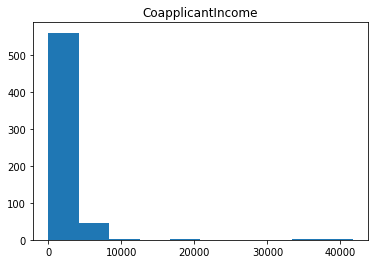

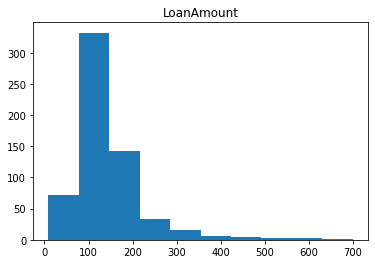

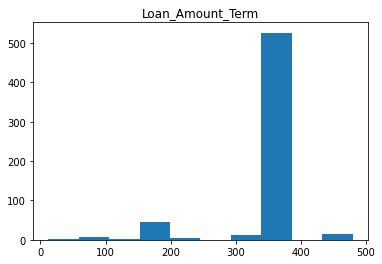

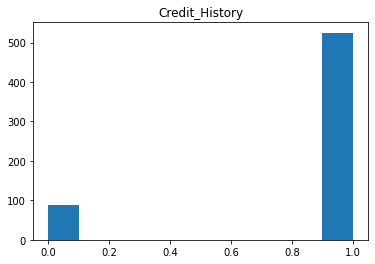

In [96]:
for i in loan_num:
    plt.hist(loan_num[i])
    plt.title(i)
    plt.show()

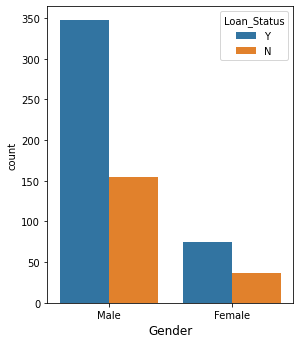

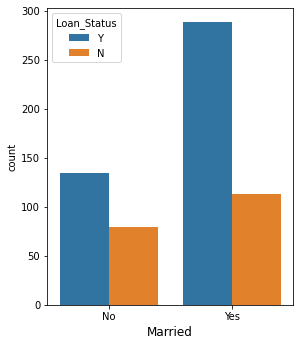

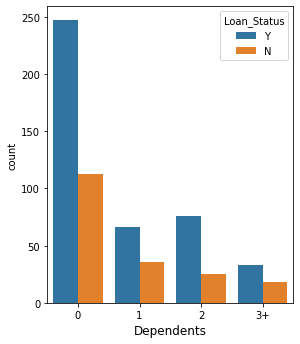

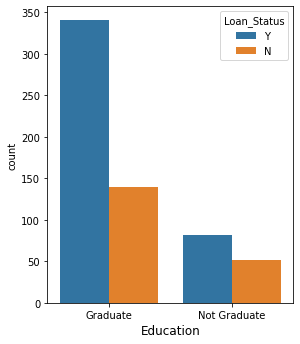

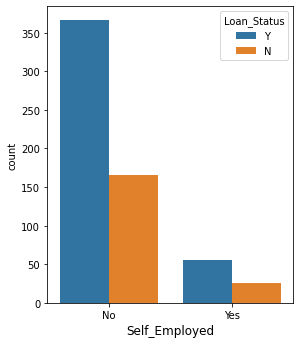

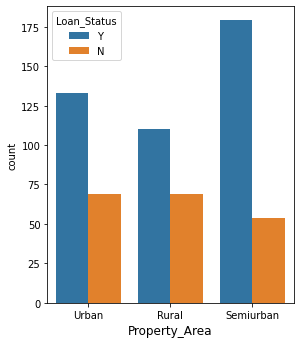

In [97]:
for i in cat[:-1]:
    plt.figure(figsize=(15,12))
    plt.subplot(2,3,1)
    sns.countplot(x=i ,hue='Loan_Status', data= data_train )
    plt.xlabel(i, fontsize=12)

Encoding Categorical data to numeric

In [98]:

#converting categorical values to numbers

to_num = {'Male': 1, 'Female': 2,'Yes': 1, 'No': 2,'Graduate': 1, 'Not Graduate': 2,'Urban': 3, 'Semiurban': 2,'Rural': 1,'Y': 1, 'N': 0,'3+': 3}

# adding the new numeric values from the to_num variable to both datasets
data_train = data_train.applymap(lambda lable: to_num.get(lable) if lable in to_num else lable)
data_test = data_test.applymap(lambda lable: to_num.get(lable) if lable in to_num else lable)

# converting the Dependents coloumn
Dependents_ = pd.to_numeric(data_train.Dependents)
Dependents__ = pd.to_numeric(data_test.Dependents)

# dropping the previous Dependents coloumn
data_train.drop(['Dependents'], axis = 1, inplace = True)
data_test.drop(['Dependents'], axis = 1, inplace = True)




In [99]:
# concatination of the new Dependents coloumn with both datasets
data_train = pd.concat([data_train, Dependents_], axis = 1)
data_test = pd.concat([data_test, Dependents__], axis = 1)

# checking the our manipulated dataset for validation
print(f"training set (row, col): {data_train.shape}\n\ntesting set (row, col): {data_test.shape}\n")
print(data_train.info(), "\n\n", data_test.info())

training set (row, col): (614, 12)

testing set (row, col): (367, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
 11  Dependents         614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 column

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
Gender,1.000000,0.364569,-0.045364,-0.000525,-0.058809,-0.082912,-0.106404,0.074030,-0.009170,0.025752,-0.017987,-0.172914
Married,0.364569,1.000000,-0.012304,0.004489,-0.051708,-0.075948,-0.146212,0.100912,-0.010938,-0.004257,-0.091478,-0.334216
Education,-0.045364,-0.012304,1.000000,0.010383,-0.140760,-0.062290,-0.169436,-0.073928,-0.073658,-0.065243,-0.085884,0.055752
Self_Employed,-0.000525,0.004489,0.010383,1.000000,-0.127180,0.016100,-0.114971,0.033739,0.001550,0.030860,0.003700,-0.056798
ApplicantIncome,-0.058809,-0.051708,-0.140760,-0.127180,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.009500,-0.004710,0.118202
CoapplicantIncome,-0.082912,-0.075948,-0.062290,0.016100,-0.116605,1.000000,0.189723,-0.059383,0.011134,0.010522,-0.059187,0.030430
LoanAmount,-0.106404,-0.146212,-0.169436,-0.114971,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.047414,-0.031808,0.163017
Loan_Amount_Term,0.074030,0.100912,-0.073928,0.033739,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.076120,-0.022549,-0.103864
Credit_History,-0.009170,-0.010938,-0.073658,0.001550,-0.018615,0.011134,-0.000250,-0.004705,1.000000,0.001963,0.540556,-0.040160
Property_Area,0.025752,-0.004257,-0.065243,0.030860,-0.009500,0.010522,-0.047414,-0.076120,0.001963,1.000000,0.032112,-0.000244


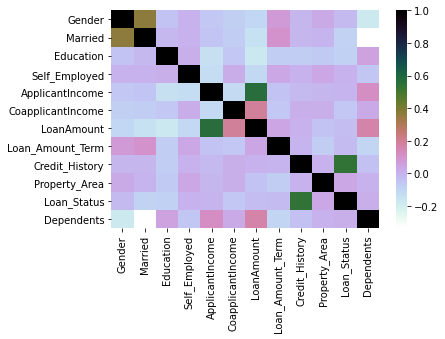

In [100]:
# lets plot the correlation matrix 
sns.heatmap(data_train.corr(), cmap = 'cubehelix_r')
corr = data_train.corr()
corr

We can clearly see that Credit_History has the highest correlation with Loan_Status(0.54)

Modelling

for modelling the data will be divided as X and Y where X as features and y as loan_status which is our target value we already defined.

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
y = data_train['Loan_Status']
x = data_train.drop('Loan_Status', axis = 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [103]:
# Decision Trees

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


DT = DecisionTreeClassifier()
DT.fit(x_train, y_train)

y_predict = DT.predict(x_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
DT_SC = accuracy_score(y_predict,y_test)
print(f"{round(DT_SC*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.45      0.51      0.48        51
           1       0.80      0.76      0.78       134

    accuracy                           0.69       185
   macro avg       0.63      0.64      0.63       185
weighted avg       0.71      0.69      0.70       185

69.19% Accurate


In [104]:
# this will create an csv file in which each prediction and true value are given side by side

Decision_Tree = pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Decision_Tree.to_csv("Decision_Tree.csv")     

# D_T = pd.read_csv(r'C:\Users\divya\OneDrive\Desktop\loan_prediction\Decision_Tree.csv')
# D_T.head()

In [105]:
# Random Forest 

from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train, y_train)

y_predict = RF.predict(x_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
RF_SC = accuracy_score(y_predict,y_test)
print(f"{round(RF_SC*100,2)}% Accurate")


              precision    recall  f1-score   support

           0       0.69      0.43      0.53        51
           1       0.81      0.93      0.86       134

    accuracy                           0.79       185
   macro avg       0.75      0.68      0.70       185
weighted avg       0.78      0.79      0.77       185

78.92% Accurate


In [106]:
# this will create an csv file in which each prediction and true value are given side by side

Random_Forest=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Random_Forest.to_csv("Random Forest.csv") 

XGBOOST

In [107]:
from xgboost import XGBClassifier

XGB = XGBClassifier()
XGB.fit(x_train, y_train)

y_predict = XGB.predict(x_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
XGB_SC = accuracy_score(y_predict,y_test)
print(f"{round(XGB_SC*100,2)}% Accurate")


C:\Python39\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:54:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.65      0.55      0.60        51
           1       0.84      0.89      0.86       134

    accuracy                           0.79       185
   macro avg       0.74      0.72      0.73       185
weighted avg       0.79      0.79      0.79       185

79.46% Accurate


In [108]:
# this will create an csv file in which each prediction and true value are given side by side

XGBoost=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
XGBoost.to_csv("XGBoost.csv")  

Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train, y_train)

y_predict = LR.predict(x_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
LR_SC = accuracy_score(y_predict,y_test)
print('accuracy is',accuracy_score(y_predict,y_test))


              precision    recall  f1-score   support

           0       0.92      0.43      0.59        51
           1       0.82      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185

accuracy is 0.8324324324324325


C:\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [110]:
# this will create an csv file in which each prediction and true value are given side by side

Logistic_Regression=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Logistic_Regression.to_csv("Logistic Regression.csv")   

In [111]:
# Accuracy score of different algorithms

score = [DT_SC,RF_SC,XGB_SC,LR_SC]
Models = pd.DataFrame({
    'n_neighbours': ["Decision Tree","Random Forest","XGBoost", "Logistic Regression"],
    'Score': score})
Models.sort_values(by='Score')

,n_neighbours,Score
0,Decision Tree,0.691892
1,Random Forest,0.789189
2,XGBoost,0.794595
3,Logistic Regression,0.832432


Conclusion:
1. Credit_History is a very important variable because of its high correlation with Loan_Status, therefore showing high Dependency.
2. The Logistic Regression algorithm is the most accurate: approximately 83%.